In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from datasets import MNISTDataset

11490434/11490434 [==============================] - 0s 0us/step


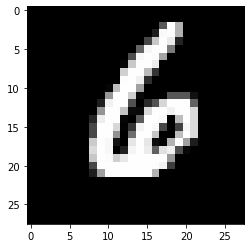

6
(28, 28)


In [4]:
# mnist is a api or link to MNIST dataset - keras.api._v2.keras.datasets.mnist
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Splitting the dataset into training & Testing set

# we can look at any of the images and the corresponding labels
# say, image no. 155
plt.imshow(train_images[155], cmap="Greys_r")
plt.show()
print(train_labels[155])
train_images.reshape(-1,2)
# images are "flattened" into vectors to avoid heavy memory usage
data = MNISTDataset(train_images.reshape([-1, 28*28]), train_labels, 
                    test_images.reshape([-1, 28*28]), test_labels,
                    batch_size=128)
print(train_images[155].shape)

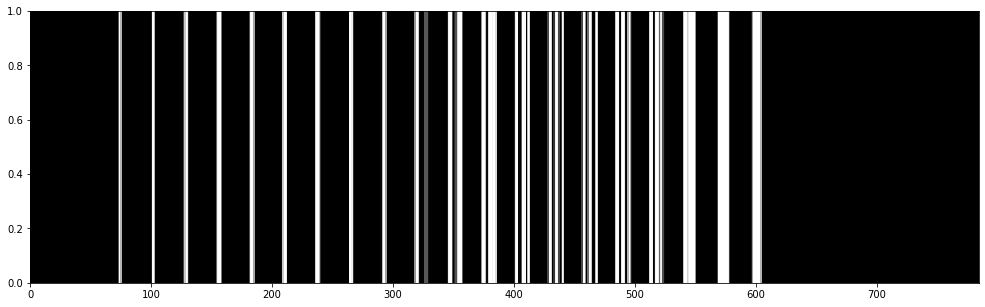

In [5]:
# here is an attempt at illustrating what flattening looks like
reshaped = train_images[155].reshape((-1, 28*28))
plt.figure(figsize=(17, 5))
plt.pcolormesh(reshaped, cmap="Greys_r")
plt.show()

In [6]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [7]:
# Weights and bias initialization
w0 = tf.Variable(np.random.uniform(size=(784,256), low=-0.1, high=0.1).astype(np.float32))
b0 = tf.Variable(np.random.uniform(size = 256, low=-0.1, high=0.1).astype(np.float32))
w1 = tf.Variable(np.random.uniform(size =(256,256), low=-0.1, high=0.1).astype(np.float32))
b1 = tf.Variable(np.random.uniform(size = 256, low=-0.1, high=0.1).astype(np.float32))
out_w = tf.Variable(np.random.uniform(size =(256,10), low=-0.1, high=0.1).astype(np.float32))
out_b = tf.Variable(np.random.uniform(size = 10, low=-0.1, high=0.1).astype(np.float32))

# Using Activation function RELU to overcome Vanishing Gradient Problem 
def model(inputs):
  # Input Layer 
  layer_1 = tf.add(tf.matmul(inputs, w0), b0) 
  layer_1 = tf.nn.relu(layer_1)
  # Hidden Layer 
  layer_2 = tf.add(tf.matmul(layer_1, w1), b1)
  layer_2 = tf.nn.relu(layer_2)
  # Output Layer
  out_layer = tf.matmul(layer_2, out_w) + out_b
  return out_layer
    
train_steps = 4000
learning_rate = 0.1

In [8]:
# training loop
for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()
    
    with tf.GradientTape() as tape:
      logits = model(image_batch)

      xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=label_batch))
         
      grads = tape.gradient(xent, [w0, b0, w1, b1, out_w, out_b])

      w0.assign_sub(learning_rate * grads[0])
      b0.assign_sub(learning_rate * grads[1])
      w1.assign_sub(learning_rate * grads[2])
      b1.assign_sub(learning_rate * grads[3])
      out_w.assign_sub(learning_rate * grads[4])
      out_b.assign_sub(learning_rate * grads[5])
    
    # every so often we print loss/accuracy
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, xent, acc))


Step 1. Batch loss: 2.362889289855957 Batch accuracy: 0.109375
Step 101. Batch loss: 0.4171752333641052 Batch accuracy: 0.875
Step 201. Batch loss: 0.33697962760925293 Batch accuracy: 0.8828125
Step 301. Batch loss: 0.3130910396575928 Batch accuracy: 0.90625
Step 401. Batch loss: 0.38504934310913086 Batch accuracy: 0.8984375
Starting new epoch...
Step 501. Batch loss: 0.2060939371585846 Batch accuracy: 0.9375
Step 601. Batch loss: 0.25789332389831543 Batch accuracy: 0.8984375
Step 701. Batch loss: 0.21993699669837952 Batch accuracy: 0.9375
Step 801. Batch loss: 0.169215589761734 Batch accuracy: 0.9375
Step 901. Batch loss: 0.12731610238552094 Batch accuracy: 0.96875
Starting new epoch...
Step 1001. Batch loss: 0.1967979371547699 Batch accuracy: 0.9296875
Step 1101. Batch loss: 0.15904714167118073 Batch accuracy: 0.9453125
Step 1201. Batch loss: 0.08880007266998291 Batch accuracy: 0.9921875
Step 1301. Batch loss: 0.16642117500305176 Batch accuracy: 0.9609375
Step 1401. Batch loss: 0.138

In [9]:
test_preds = tf.argmax(model(data.test_data), axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Test accuracy: {}".format(acc))

Test accuracy: 0.974399983882904


#Observations

1. When learning rate is changed from **0.1** to **0.01** then Accruracy is changed from **96.87** to **90.89**, because with lower learning rate model converges slowly.

2. When we train the model with more training steps(EPOCH), the test accuracy is increased.